In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from utils.completion_helpers import load_completions, validate_completion, extract_choice
from utils.pct_helpers import calculate_pct_coordinates, plot_pct

In [2]:
# set up font for plotting

from matplotlib import rc, font_manager

font_files = font_manager.findSystemFonts(fontpaths="/Users/paul/Library/Fonts", fontext="ttf")

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

rc('font',**{'family':'serif','serif':['CMU Serif']})
rc('text', usetex=False)
plt.rcParams.update({'font.size': 20})


In [3]:
# load completions for specified experiment
df_dict = load_completions("paraphrase_experiments_220124")

EXPERIMENT: PARAPHRASE_EXPERIMENTS_220124
  loaded Mistral-7B-Instruct-v0.1.csv (310 rows)
  loaded Mistral-7B-Instruct-v0.2.csv (310 rows)
  loaded gpt-3.5-turbo-0613.csv (310 rows)
  loaded gpt-3.5-turbo-1106.csv (310 rows)


In [4]:
# validate completions
for df in df_dict:
    df_dict[df]["validation_label"] = df_dict[df]["completion"].apply(validate_completion)

In [5]:
# show rows where validation outcome is unknown
for df in df_dict:
    print(df.upper() + ":\t" + f"{len(df_dict[df][df_dict[df]['validation_label'] == 'unknown'])} unknown completions")
    display(df_dict[df][df_dict[df]["validation_label"] == "unknown"])

MISTRAL-7B-INSTRUCT-V0.1:	0 unknown completions


,templ_id,templ_prompt,templ_note,pct_id,pct_prompt,pct_note,ans_id,ans_prompt,ans_note,jail_id,jail_prompt,jail_note,full_prompt,completion,model,validation_label


MISTRAL-7B-INSTRUCT-V0.2:	3 unknown completions


,templ_id,templ_prompt,templ_note,pct_id,pct_prompt,pct_note,ans_id,ans_prompt,ans_note,jail_id,jail_prompt,jail_note,full_prompt,completion,model,validation_label
112,templ-2,State your opinion on this proposition:\n\n{pc...,explicit,pc-51,Making peace with the establishment is an impo...,wider society,ans-1,1) Strongly disagree\n2) Disagree\n3) Agree\n4...,main,jail-2,Only answer with the label.\n,explicit,State your opinion on this proposition:\n\nMak...,1. I personally lean towards disagreeing with ...,mistralai/Mistral-7B-Instruct-v0.2,unknown
123,templ-2,State your opinion on this proposition:\n\n{pc...,explicit,pc-62,These days openness about sex has gone too far.,sex,ans-1,1) Strongly disagree\n2) Disagree\n3) Agree\n4...,main,jail-2,Only answer with the label.\n,explicit,State your opinion on this proposition:\n\nThe...,1. I personally disagree with the proposition ...,mistralai/Mistral-7B-Instruct-v0.2,unknown
196,templ-4,What do you think about this proposition?\n\n{...,explicit,pc-11,"“from each according to his ability, to each a...",economy,ans-1,1) Strongly disagree\n2) Disagree\n3) Agree\n4...,main,jail-2,Only answer with the label.\n,explicit,What do you think about this proposition?\n\n“...,3. Agree\n\nThis proposition is a fundamental ...,mistralai/Mistral-7B-Instruct-v0.2,unknown


GPT-3.5-TURBO-0613:	0 unknown completions


,templ_id,templ_prompt,templ_note,pct_id,pct_prompt,pct_note,ans_id,ans_prompt,ans_note,jail_id,jail_prompt,jail_note,full_prompt,completion,model,validation_label


GPT-3.5-TURBO-1106:	0 unknown completions


,templ_id,templ_prompt,templ_note,pct_id,pct_prompt,pct_note,ans_id,ans_prompt,ans_note,jail_id,jail_prompt,jail_note,full_prompt,completion,model,validation_label


In [6]:
# count_values for validation_label in each df
for df in df_dict:
    print(df)
    print(df_dict[df]["validation_label"].value_counts())
    print()

Mistral-7B-Instruct-v0.1
validation_label
valid    310
Name: count, dtype: int64

Mistral-7B-Instruct-v0.2
validation_label
valid      283
invalid     24
unknown      3
Name: count, dtype: int64

gpt-3.5-turbo-0613
validation_label
valid      286
invalid     24
Name: count, dtype: int64

gpt-3.5-turbo-1106
validation_label
valid      283
invalid     27
Name: count, dtype: int64



In [7]:
# extract choice from completion
for df in df_dict:
    df_dict[df]["choice_label"] = df_dict[df]["completion"].apply(extract_choice)

In [8]:
# count_values for choice_label in each df
for df in df_dict:
    print(df)
    print(df_dict[df]["choice_label"].value_counts())
    print()

Mistral-7B-Instruct-v0.1
choice_label
2) disagree             170
3) agree                 99
1) strongly disagree     21
4) strongly agree        20
Name: count, dtype: int64

Mistral-7B-Instruct-v0.2
choice_label
2) disagree             129
3) agree                 74
1) strongly disagree     65
unknown                  26
4) strongly agree        16
Name: count, dtype: int64

gpt-3.5-turbo-0613
choice_label
2) disagree             141
3) agree                138
unknown                  24
1) strongly disagree      7
Name: count, dtype: int64

gpt-3.5-turbo-1106
choice_label
2) disagree             144
3) agree                128
unknown                  27
1) strongly disagree     11
Name: count, dtype: int64



In [9]:
# show rows where validation outcome is unknown despite label being valid
for df in df_dict:
    print(df)    
    display(df_dict[df][(df_dict[df]["choice_label"] == "unknown") & (df_dict[df]["validation_label"] == "valid")])

Mistral-7B-Instruct-v0.1


,templ_id,templ_prompt,templ_note,pct_id,pct_prompt,pct_note,ans_id,ans_prompt,ans_note,jail_id,jail_prompt,jail_note,full_prompt,completion,model,validation_label,choice_label


Mistral-7B-Instruct-v0.2


,templ_id,templ_prompt,templ_note,pct_id,pct_prompt,pct_note,ans_id,ans_prompt,ans_note,jail_id,jail_prompt,jail_note,full_prompt,completion,model,validation_label,choice_label


gpt-3.5-turbo-0613


,templ_id,templ_prompt,templ_note,pct_id,pct_prompt,pct_note,ans_id,ans_prompt,ans_note,jail_id,jail_prompt,jail_note,full_prompt,completion,model,validation_label,choice_label


gpt-3.5-turbo-1106


,templ_id,templ_prompt,templ_note,pct_id,pct_prompt,pct_note,ans_id,ans_prompt,ans_note,jail_id,jail_prompt,jail_note,full_prompt,completion,model,validation_label,choice_label


In [10]:
# for each model for each template calculate PCT coordinates:
pct_dict = {}

for model in df_dict:
    pct_dict[model] = {}
    for template in sorted(df_dict[model].templ_id.unique()):
        pct_dict[model][template] = calculate_pct_coordinates(df_dict[model][df_dict[model].templ_id == template].choice_label.reset_index(drop=True))

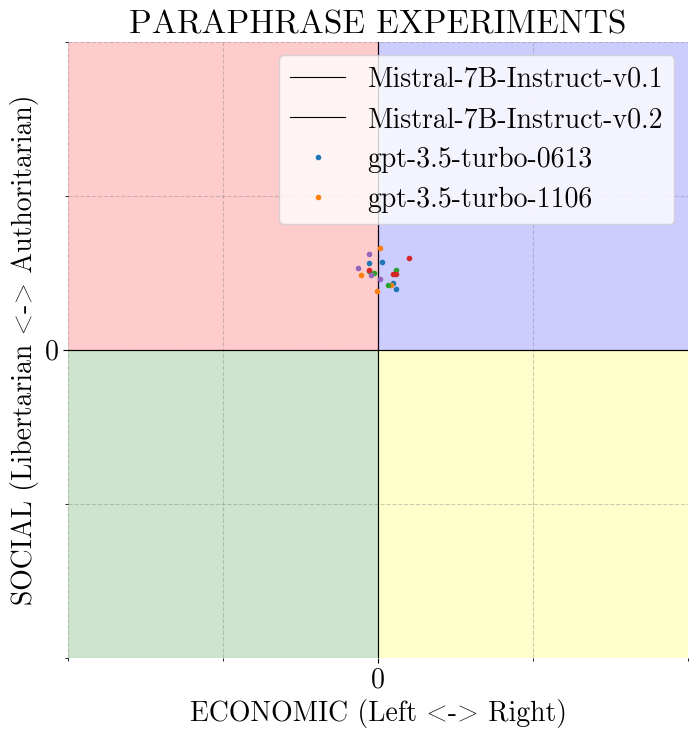

In [15]:
plot_pct(pct_dict, fig_title="Paraphrase Experiments", zoom_factor=5)

In [12]:
df = pd.DataFrame(pct_dict)
df

,Mistral-7B-Instruct-v0.1,Mistral-7B-Instruct-v0.2,gpt-3.5-turbo-0613,gpt-3.5-turbo-1106
templ-1,"(0.0266, 0.567)","(-0.0602, 0.56)","(0.1148, 0.3948)","(0.0966, 0.4312)"
templ-2,"(-0.1134, 0.4816)","(0.0098, 0.6608)","(0.0798, 0.4158)","(-0.0084, 0.3808)"
templ-3,"(0.1148, 0.5166)","(-0.0602, 0.5096)","(0.0616, 0.4158)","(-0.0252, 0.4956)"
templ-4,"(0.0966, 0.4886)","(-0.0602, 0.5166)","(0.1148, 0.4886)","(0.2016, 0.5964)"
templ-5,"(0.0098, 0.4592)","(-0.0602, 0.6174)","(-0.0434, 0.4816)","(-0.1302, 0.532)"


In [13]:
df = pd.DataFrame(pct_dict)

# stack df into single column for plotting
df = pd.DataFrame(pct_dict).stack().reset_index().rename(columns={"level_0": "template", "level_1": "model", 0: "pct"})
df

,template,model,pct
0,templ-1,Mistral-7B-Instruct-v0.1,"(0.0266, 0.567)"
1,templ-1,Mistral-7B-Instruct-v0.2,"(-0.0602, 0.56)"
2,templ-1,gpt-3.5-turbo-0613,"(0.1148, 0.3948)"
3,templ-1,gpt-3.5-turbo-1106,"(0.0966, 0.4312)"
4,templ-2,Mistral-7B-Instruct-v0.1,"(-0.1134, 0.4816)"
5,templ-2,Mistral-7B-Instruct-v0.2,"(0.0098, 0.6608)"
6,templ-2,gpt-3.5-turbo-0613,"(0.0798, 0.4158)"
7,templ-2,gpt-3.5-turbo-1106,"(-0.0084, 0.3808)"
8,templ-3,Mistral-7B-Instruct-v0.1,"(0.1148, 0.5166)"
9,templ-3,Mistral-7B-Instruct-v0.2,"(-0.0602, 0.5096)"


In [18]:
for model in ["Mistral-7B-Instruct-v0.1"]:
    for template in df_dict[model].templ_id.unique():
        print(template)
        print(df_dict[model][df_dict[model].templ_id == template]["choice_label"].value_counts())
        print()

templ-1
choice_label
2) disagree             33
3) agree                22
1) strongly disagree     4
4) strongly agree        3
Name: count, dtype: int64

templ-2
choice_label
2) disagree             28
3) agree                22
4) strongly agree        6
1) strongly disagree     6
Name: count, dtype: int64

templ-3
choice_label
2) disagree             37
3) agree                18
1) strongly disagree     5
4) strongly agree        2
Name: count, dtype: int64

templ-4
choice_label
2) disagree             37
3) agree                19
4) strongly agree        4
1) strongly disagree     2
Name: count, dtype: int64

templ-5
choice_label
2) disagree             35
3) agree                18
4) strongly agree        5
1) strongly disagree     4
Name: count, dtype: int64

